In [12]:

import numpy as np
import matplotlib.pyplot as plt

#                ->   [x1,    x2]
individuo = np.array([[0.5,  0.5],       
                      [0.1,  0.2],      
                      [0.7,  0.9],      
                      [0.85,0.85],    
                              ])

# pesos    se pueden cambiar
w =np.array( [[0.7, 0.3, 0.5, 0.6, 0.1], # pesos para x1
              [0.1, 0.9, 0.6, 0.9, 0.1], # pesos para x2
                        ])

# Lista para almacenar los valores de alpha en cada época
pAprendizajes = []
# Parámetro de aprendizaje
alpha_inicial = 0.3
alpha_final = 0.01

# Número de épocas
num_epocas = 1

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 5 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    # el parametro de aprendisaje disminuye cada epoca
    pa = alpha_inicial * (alpha_final/alpha_inicial)**(epoca+1/num_epocas)
    pAprendizajes.append(pa)
    for i in range(len(individuo)):
        print(f"\nProcesando individuo {i}: {individuo[i]}")
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            D = dx**2 + dy**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
        print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        
        # 3. Actualizar pesos: neurona ganadora y sus vecinas
        if indice_min == 0:
            print("Caso: neurona ganadora es la primera (índice 0)")
            # Actualizar neurona ganadora (0) y su vecina derecha (1)
            for k in [0, 1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        elif indice_min == longitud:
            print(f"Caso: neurona ganadora es la última (índice {longitud})")
            # Actualizar neurona ganadora (longitud) y su vecina izquierda (longitud-1)
            for k in [longitud, longitud-1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
                
        else:
            print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
            # Actualizar neurona ganadora y sus dos vecinas (izquierda y derecha)
            for k in [indice_min-1, indice_min, indice_min+1]:
                w[0, k] += pa * (individuo[i, 0] - w[0, k])
                w[1, k] += pa * (individuo[i, 1] - w[1, k])
        
        print("Pesos actualizados:")
        print(w)
        
print("\n--- Pesos finales ---")
print(w)



--- Época 1 ---

Procesando individuo 0: [0.5 0.5]
Distancias calculadas: [0.2, 0.20000000000000004, 0.009999999999999995, 0.17000000000000004, 0.32000000000000006]
Neurona ganadora: índice 2, distancia 0.0100
Caso: neurona ganadora es intermedia (índice 2)
Pesos actualizados:
[[0.7   0.302 0.5   0.599 0.1  ]
 [0.1   0.896 0.599 0.896 0.1  ]]

Procesando individuo 1: [0.1 0.2]
Distancias calculadas: [0.37, 0.5252199999999999, 0.319201, 0.733417, 0.010000000000000002]
Neurona ganadora: índice 4, distancia 0.0100
Caso: neurona ganadora es la última (índice 4)
Pesos actualizados:
[[0.7     0.302   0.5     0.59401 0.1    ]
 [0.1     0.896   0.599   0.88904 0.101  ]]

Procesando individuo 2: [0.7 0.9]
Distancias calculadas: [0.6400000000000001, 0.15841999999999995, 0.13060100000000002, 0.011354001700000007, 0.9984010000000001]
Neurona ganadora: índice 3, distancia 0.0114
Caso: neurona ganadora es intermedia (índice 3)
Pesos actualizados:
[[0.7       0.302     0.502     0.5950699 0.106    ]

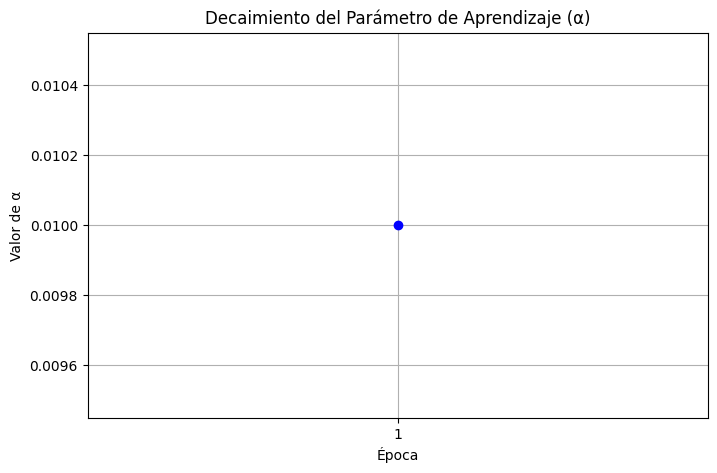

In [13]:
# Gráfica del decaimiento de α
plt.figure(figsize=(8, 5))
epocas = range(1, num_epocas + 1)  # Corregido: usar num_epocas en lugar de len(aciertos)
plt.plot(epocas, pAprendizajes, marker='o', linestyle='-', color='b')
plt.title('Decaimiento del Parámetro de Aprendizaje (α)')
plt.xlabel('Época')
plt.ylabel('Valor de α')
plt.grid(True)
plt.xticks(epocas)  # Mostrar todas las épocas en el eje X
plt.show()

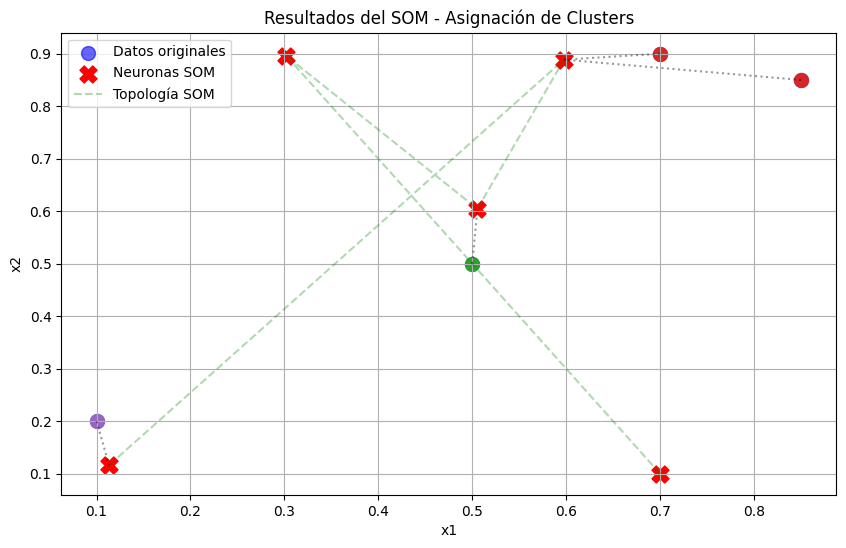

In [14]:
# Código adicional para visualización
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(individuo[:, 0], individuo[:, 1], c='blue', label='Datos originales', s=100, alpha=0.6)

# Graficar los pesos finales de las neuronas
plt.scatter(w[0, :], w[1, :], c='red', marker='X', label='Neuronas SOM', s=150)

# Conectar las neuronas para mostrar la topología
plt.plot(w[0, :], w[1, :], 'g--', alpha=0.3, label='Topología SOM')

# Asignar cada punto a su neurona ganadora y colorear
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(num_neuronas)]
    neurona_ganadora = np.argmin(distancias)
    plt.plot([individuo[i, 0], w[0, neurona_ganadora]], 
             [individuo[i, 1], w[1, neurona_ganadora]], 
             'k:', alpha=0.4)
    
    # Colorear según la neurona ganadora
    plt.scatter(individuo[i, 0], individuo[i, 1], c=f'C{neurona_ganadora}', s=100)

plt.title('Resultados del SOM - Asignación de Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()